In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

#1.Data Loading
df=pd.read_csv("D:/OASIS DATA ANALYSIS/project1/retail_sales_dataset.csv")
print(df.head()) #first 5 rows will display
print(df.dtypes) #display data types

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [3]:
#2.Data Cleaning
print(df.isnull().sum()) #checking for missing values
df.dropna(inplace=True) #missing value will drop if any

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [4]:
#3.Descriptive Statistics
print(df.describe()) #display Mean,Median(50%),Standard Deviation(std),min,max,Interquartile,count of dataset
print("\nMode:\n",df[['Age','Quantity','Price per Unit','Total Amount']].mode())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000

Mode:
    Age  Quantity  Price per Unit  Total Amount
0   43       4.0            50.0          50.0
1   64       NaN             NaN           NaN


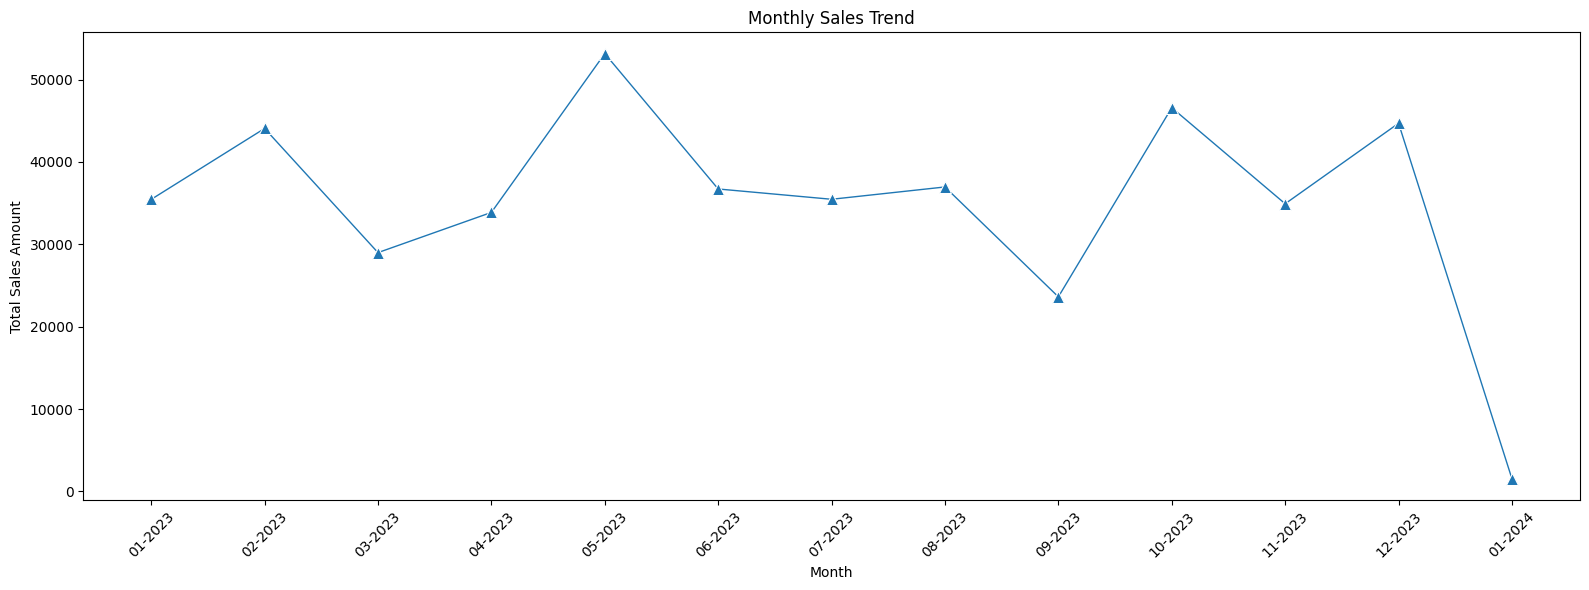

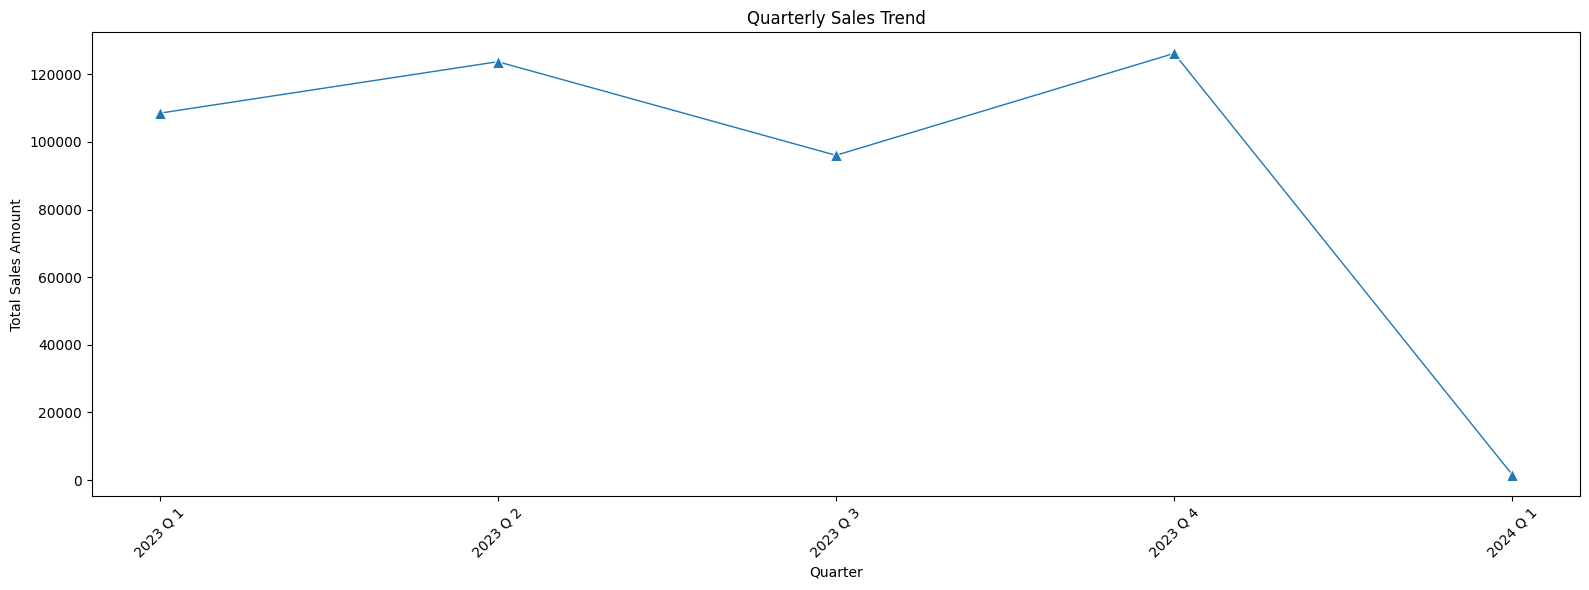

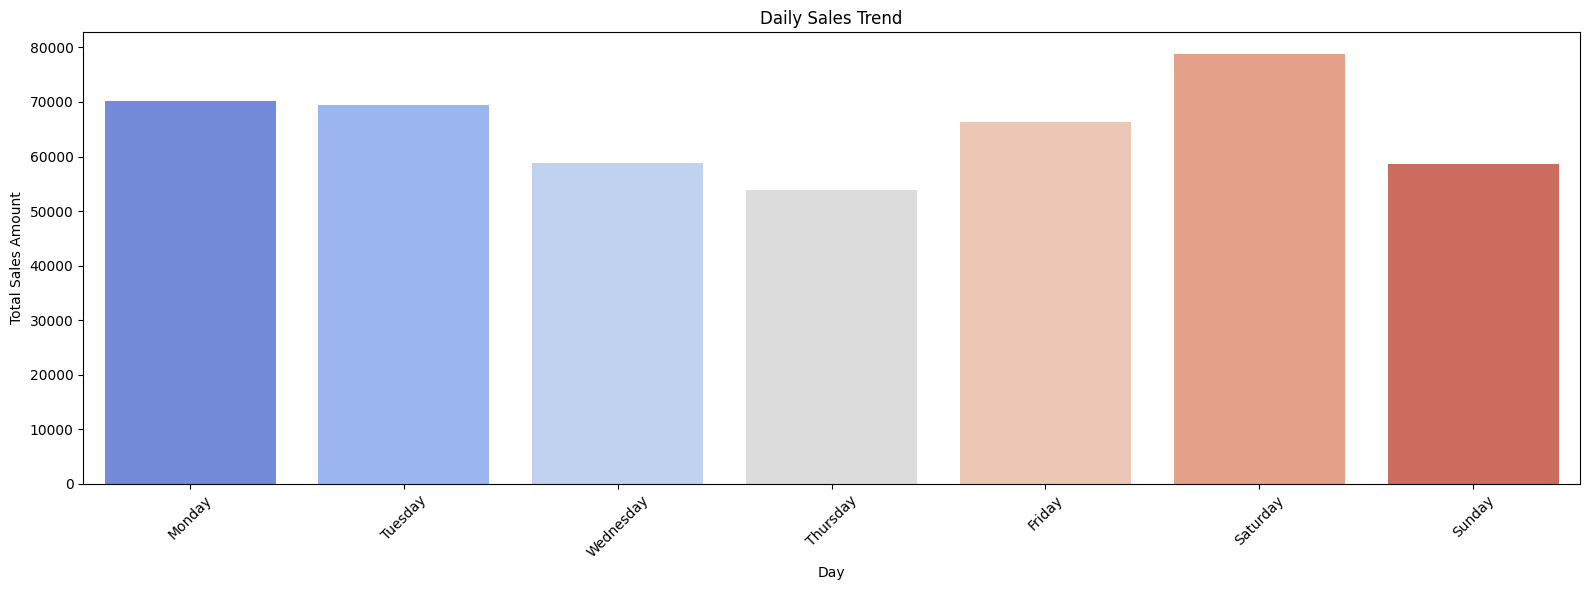

In [5]:
#4.Time Series Analysis
from datetime import datetime
import matplotlib.pyplot as plt
df['Date']=pd.to_datetime(df['Date']) #converting date to datetime format

#Additional Time-Based Feature
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['Quarter']=df['Date'].dt.quarter
df['dayofweek']=df['Date'].dt.day_name()

# Monthly sales trend
monthlysales = df.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()
monthlysales['YearMonth'] = monthlysales['Month'].astype(str).str.zfill(2) + '-' + monthlysales['Year'].astype(str)

#ploting graph for monthly sales 
plt.figure(figsize=(16, 6))
sns.lineplot(x='YearMonth', y='Total Amount', data=monthlysales, marker='^',markersize=9,linestyle='-',linewidth=1)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Quarterly sales trend
quarterlysales = df.groupby(['Year', 'Quarter'])['Total Amount'].sum().reset_index()
quarterlysales['YearQuarter'] =  quarterlysales['Year'].astype(str) + ' Q ' + quarterlysales['Quarter'].astype(str)

#ploting graph for Quarterly sales 
plt.figure(figsize=(16, 6))
sns.lineplot(x='YearQuarter', y='Total Amount', data=quarterlysales, marker='^',markersize=9,linestyle='-',linewidth=1)
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Daily sales trend
Dailysales = df.groupby(['dayofweek'])['Total Amount'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index()

#ploting graph for Quarterly sales 
plt.figure(figsize=(16, 6))
sns.barplot(x='dayofweek', y='Total Amount', data=Dailysales,palette='coolwarm',hue='dayofweek',legend=False)
plt.title('Daily Sales Trend')
plt.xlabel('Day')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Customer ID
CUST015    2000
CUST412    2000
CUST970    2000
CUST547    2000
CUST281    2000
Name: Total Amount, dtype: int64


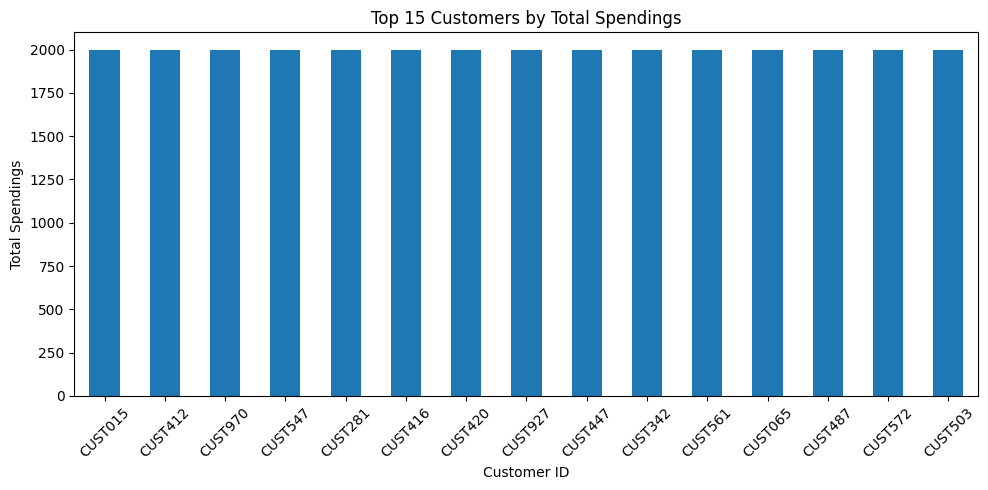

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


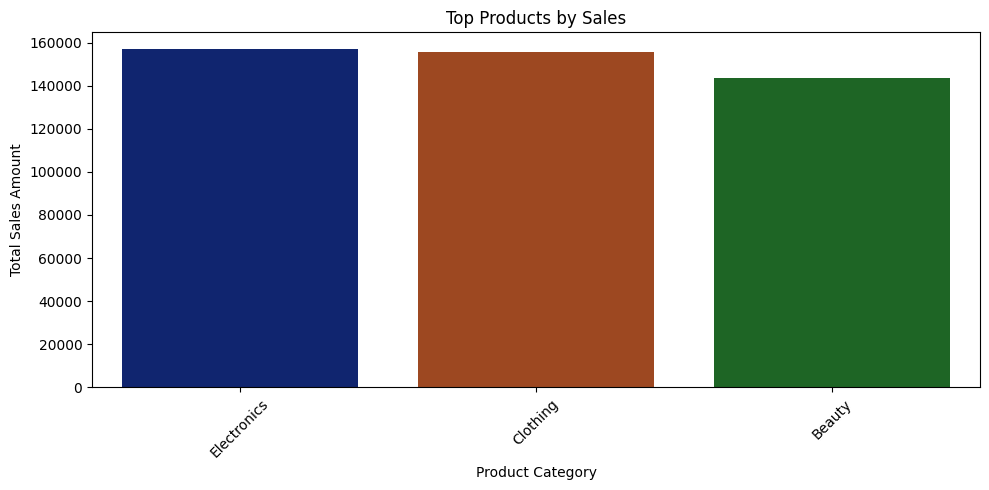


Top spendings by both genders

Gender Product Category  Total Amount
Female         Clothing         81275
  Male      Electronics         80170


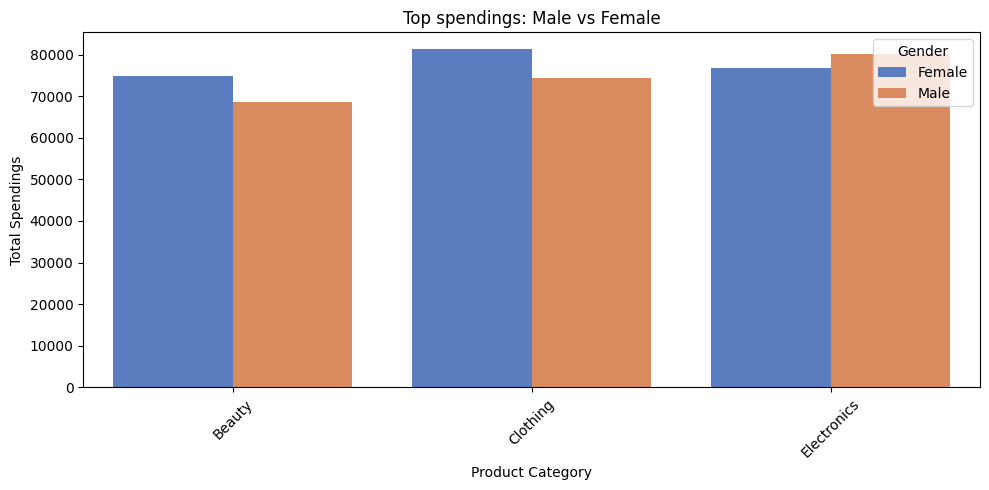


Top spendings by both Age Group

AgeGroup Product Category  Total Amount
   45-60      Electronics         51920
   30-45      Electronics         49375
   45-60         Clothing         48415
   45-60           Beauty         47540
   30-45         Clothing         47365


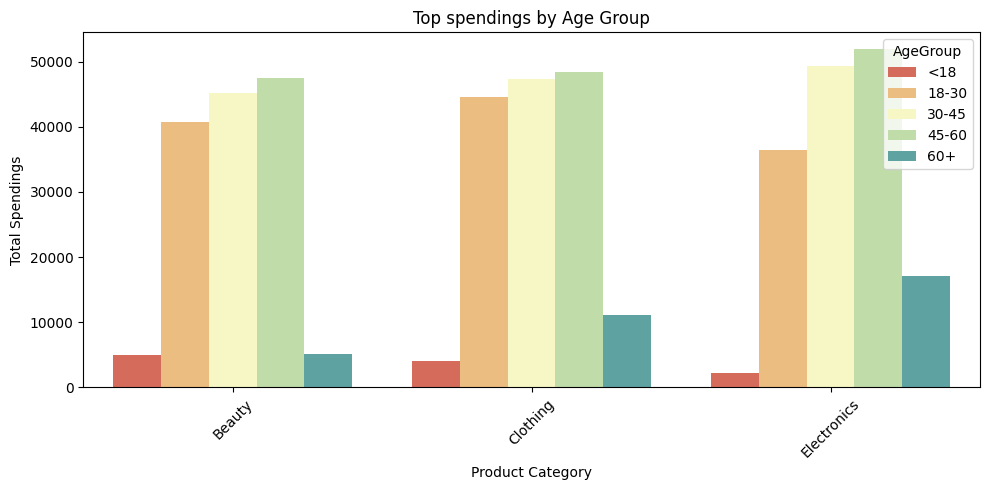

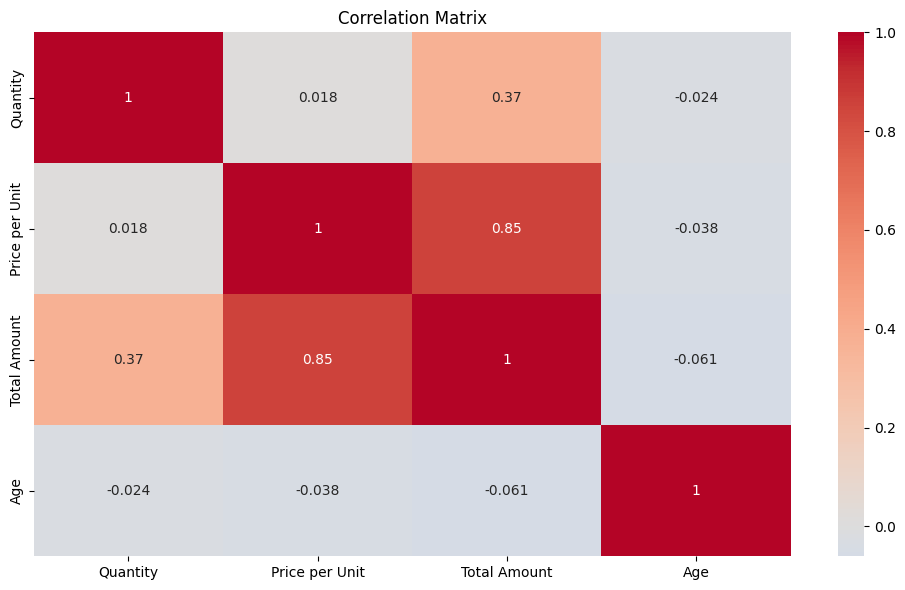

In [6]:
#5.Customer and Product Analysis
#top customer by spendings
topcusto=df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False)
print(topcusto.head()) #top 5 customers

#graph for customer analysis
plt.figure(figsize=(10,5))
topcusto.head(15).plot(kind='bar') #top 15 customers
plt.title('Top 15 Customers by Total Spendings')
plt.xlabel('Customer ID')
plt.ylabel('Total Spendings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#top product category by sales
topproduct=df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print(topproduct.head())

#graph for product analysis
plt.figure(figsize=(10,5))
sns.barplot(x=topproduct.index, y=topproduct.values, palette='dark', hue=topproduct.index,legend=False) #top product
plt.title('Top Products by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#gender,product category and Total spending Analysis
genprotal=df.groupby(['Gender','Product Category'])['Total Amount'].sum().reset_index()
#top spendings by both genders
print("\nTop spendings by both genders\n")
print(genprotal.sort_values(by='Total Amount',ascending=False).head(2).to_string(index=False))

plt.figure(figsize=(10,5))
sns.barplot(data=genprotal, x='Product Category', y='Total Amount', hue='Gender', palette='muted')
plt.title('Top spendings: Male vs Female')
plt.xlabel('Product Category')
plt.ylabel('Total Spendings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Age,product category and Total spending Analysis
bi = [0, 18, 30, 45, 60, 100]
label = ['<18', '18-30', '30-45', '45-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bi, labels=label)
ageprotal=df.groupby(['AgeGroup','Product Category'],observed=True)['Total Amount'].sum().reset_index()
#top spendings by age group
print("\nTop spendings by both Age Group\n")
print(ageprotal.sort_values(by='Total Amount',ascending=False).head().to_string(index=False))

plt.figure(figsize=(10,5))
sns.barplot(data=ageprotal, x='Product Category', y='Total Amount', hue='AgeGroup', palette='Spectral')
plt.title('Top spendings by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Total Spendings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Correlation between Quantity,price per unit,Total Amount,Age
cols = ['Quantity', 'Price per Unit', 'Total Amount', 'Age']
corr = df[cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [7]:
#Recommendations
print("=====Recommendations Based on EDA====\n")
print("1. Run clearance sales to move inventory specially during the off seasons sales.")
print("2. Implement quarterly sales targets with tiers or level of achievement bonuses to employee or team.")
print("3. Schedule more staffs during high-volume days or high sales day.")
print("4. Run 'Weekday specials' on slower sales day to enhance sales.")
print("5. Focus on top-selling product categories (especially Electronics and Clothing) with targeted promotions.")
print("6. Increase inventory and marketing efforts during peak sales months identified in time series analysis.")
print("7. Consider gender-specific product (for female:- Clothing , for male:- Electronics) bundles or promotions.")
print("8. Create age-specific marketing campaigns based on purchasing patterns by age group.")
print("9. For Electronics category, focus on customers aged 45-60 and 30-45 who show higher spending.")
print("10. Monitor pricing strategy as there's a strong correlation between price per unit and total amount.")

=====Recommendations Based on EDA====

1. Run clearance sales to move inventory specially during the off seasons sales.
2. Implement quarterly sales targets with tiers or level of achievement bonuses to employee or team.
3. Schedule more staffs during high-volume days or high sales day.
4. Run 'Weekday specials' on slower sales day to enhance sales.
5. Focus on top-selling product categories (especially Electronics and Clothing) with targeted promotions.
6. Increase inventory and marketing efforts during peak sales months identified in time series analysis.
7. Consider gender-specific product (for female:- Clothing , for male:- Electronics) bundles or promotions.
8. Create age-specific marketing campaigns based on purchasing patterns by age group.
9. For Electronics category, focus on customers aged 45-60 and 30-45 who show higher spending.
10. Monitor pricing strategy as there's a strong correlation between price per unit and total amount.
